# Treeflow example - carnivores data

Dataset from **Suchard, Marc A., and Andrew Rambaut. "Many-core algorithms for statistical phylogenetics." *Bioinformatics* 25.11 (2009): 1370-1376.**

Sequences accessed from [Beast examples on Github](https://github.com/beast-dev/beast-mcmc/blob/v1.10.4/examples/Benchmarks/benchmark2.xml).

In [1]:
import treeflow

2022-06-21 20:28:28.074009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 20:28:28.074023: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Read input data

In [2]:
tree = treeflow.convert_tree_to_tensor(treeflow.parse_newick("demo-data/carnivores.newick"))
tree.taxon_set

2022-06-21 20:28:30.802128: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-21 20:28:30.802146: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-21 20:28:30.802161: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CS424460): /proc/driver/nvidia/version does not exist
2022-06-21 20:28:30.802864: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


('Puma_concolor_',
 'Acinonyx_jubatus_',
 'Lynx_canadensis_',
 'Felis_silvestris_',
 'Uncia_uncia_',
 'Panthera_pardus_',
 'Panthera_tigris_',
 'Neofelis_nebulosa_',
 'Herpestes_auropunctatus_',
 'Leptonychotes_weddellii_',
 'Hydrurga_leptonyx_',
 'Ommatophoca_rossii_',
 'Lobodon_carcinophaga_',
 'Mirounga_leonina_',
 'Mirounga_angustirostris_',
 'Monachus_monachus_',
 'Monachus_schauinslandi_',
 'Phoca_fasciata_',
 'Phoca_groenlandica_',
 'Phoca_caspica_',
 'Halichoerus_grypus_',
 'Phoca_sibirica_',
 'Phoca_largha_',
 'Phoca_vitulina_',
 'Phoca_hispida_',
 'Cystophora_cristata_',
 'Erignathus_barbatus_',
 'Arctocephalus_forsteri_',
 'Arctocephalus_australis_',
 'Arctocephalus_townsendi_',
 'Neophoca_cinerea_',
 'Phocarctos_hookeri_',
 'Arctocephalus_pusillus_',
 'Otaria_byronia_',
 'Zalophus_californianus_',
 'Eumetopias_jubatus_',
 'Callorhinus_ursinus_',
 'Odobenus_rosmarus_',
 'Enhydra_lutris_',
 'Lontra_canadensis_',
 'Mustela_vison_',
 'Martes_melampus_',
 'Martes_americana_',
 '

In [3]:
beast_tree = treeflow.convert_tree_to_tensor(treeflow.parse_newick("../scratch/carnivores-beast.newick"))
mapping_string = """
		   1 Acinonyx_jubatus_,
		   2 Ailuropoda_melanoleuca_,
		   3 Ailurus_fulgens_,
		   4 Alopex_lagopus_,
		   5 Arctocephalus_australis_,
		   6 Arctocephalus_forsteri_,
		   7 Arctocephalus_pusillus_,
		   8 Arctocephalus_townsendi_,
		   9 Callorhinus_ursinus_,
		  10 Canis_latrans_,
		  11 Canis_lupus_,
		  12 Cystophora_cristata_,
		  13 Enhydra_lutris_,
		  14 Erignathus_barbatus_,
		  15 Eumetopias_jubatus_,
		  16 Felis_silvestris_,
		  17 Gulo_gulo_,
		  18 Halichoerus_grypus_,
		  19 Helarctos_malayanus_,
		  20 Herpestes_auropunctatus_,
		  21 Hydrurga_leptonyx_,
		  22 Leptonychotes_weddellii_,
		  23 Lobodon_carcinophaga_,
		  24 Lontra_canadensis_,
		  25 Lynx_canadensis_,
		  26 Martes_americana_,
		  27 Martes_melampus_,
		  28 Meles_meles_,
		  29 Melursus_ursinus_,
		  30 Mephitis_mephitis_,
		  31 Mirounga_angustirostris_,
		  32 Mirounga_leonina_,
		  33 Monachus_monachus_,
		  34 Monachus_schauinslandi_,
		  35 Mustela_vison_,
		  36 Neofelis_nebulosa_,
		  37 Neophoca_cinerea_,
		  38 Odobenus_rosmarus_,
		  39 Ommatophoca_rossii_,
		  40 Otaria_byronia_,
		  41 Panthera_pardus_,
		  42 Panthera_tigris_,
		  43 Phoca_caspica_,
		  44 Phoca_fasciata_,
		  45 Phoca_groenlandica_,
		  46 Phoca_hispida_,
		  47 Phoca_largha_,
		  48 Phoca_sibirica_,
		  49 Phoca_vitulina_,
		  50 Phocarctos_hookeri_,
		  51 Procyon_lotor_,
		  52 Puma_concolor_,
		  53 Spilogale_putorius_,
		  54 Taxidea_taxus_,
		  55 Tremarctos_ornatus_,
		  56 Uncia_uncia_,
		  57 Ursus_americanus_,
		  58 Ursus_arctos_,
		  59 Ursus_maritimus_,
		  60 Ursus_thibetanus_,
		  61 Vulpes_vulpes_,
		  62 Zalophus_californianus_"""
mapping_strings = mapping_string.split()
i = 0
mapping = {}
while i < len(mapping_strings):
    key = mapping_string[i]
    mapping[mapping_strings[i]] = mapping_strings[i+1]
    i += 2
new_taxon_set = treeflow.TupleTaxonSet([mapping[x].strip(",") for x in beast_tree.taxon_set])
beast_tree.topology._taxon_set = new_taxon_set
tree = beast_tree
new_taxon_set

('Acinonyx_jubatus_',
 'Puma_concolor_',
 'Lynx_canadensis_',
 'Felis_silvestris_',
 'Neofelis_nebulosa_',
 'Panthera_pardus_',
 'Uncia_uncia_',
 'Panthera_tigris_',
 'Herpestes_auropunctatus_',
 'Ailuropoda_melanoleuca_',
 'Helarctos_malayanus_',
 'Ursus_americanus_',
 'Ursus_thibetanus_',
 'Ursus_arctos_',
 'Ursus_maritimus_',
 'Melursus_ursinus_',
 'Tremarctos_ornatus_',
 'Ailurus_fulgens_',
 'Mephitis_mephitis_',
 'Spilogale_putorius_',
 'Enhydra_lutris_',
 'Lontra_canadensis_',
 'Mustela_vison_',
 'Gulo_gulo_',
 'Martes_americana_',
 'Martes_melampus_',
 'Meles_meles_',
 'Taxidea_taxus_',
 'Procyon_lotor_',
 'Arctocephalus_australis_',
 'Arctocephalus_forsteri_',
 'Arctocephalus_townsendi_',
 'Neophoca_cinerea_',
 'Phocarctos_hookeri_',
 'Arctocephalus_pusillus_',
 'Otaria_byronia_',
 'Eumetopias_jubatus_',
 'Zalophus_californianus_',
 'Callorhinus_ursinus_',
 'Odobenus_rosmarus_',
 'Cystophora_cristata_',
 'Halichoerus_grypus_',
 'Phoca_caspica_',
 'Phoca_sibirica_',
 'Phoca_larg

In [4]:
alignment = treeflow.Alignment("demo-data/carnivores.fasta").get_compressed_alignment()
alignment

WeightedAlignment(taxon_count=62, pattern_count=5565)

Calibrations from **Hassanin, Alexandre, et al. "Evolutionary history of Carnivora (Mammalia, Laurasiatheria) inferred from mitochondrial genomes." *PloS one* 16.2 (2021): e0240770.**

In [5]:
import yaml
with open("demo-data/carnivore-calibrations.yaml") as f:
    calibration_dict = yaml.safe_load(f)
    
calibration_set = treeflow.MRCACalibrationSet(calibration_dict)
calibration_set

MRCACalibrationSet(MRCACalibration(name='Guloninae, Mustilinae', range=(12.2, 27.6)), MRCACalibration(name='Felidae', range=(14, 20)), MRCACalibration(name='Pinnipedia', range=(19, 34)))

## Model specification

### Single kappa parameter across tree

In [6]:
import tensorflow as tf
import tensorflow_probability as tfp
from treeflow import float_constant as c
from treeflow.evolution.substitution import HKY, get_transition_probabilities_tree
from tensorflow_probability.python.distributions import (
    JointDistributionNamed,
    Gamma,
    LogNormal,
    Dirichlet
)
from treeflow.distributions import (
    DiscretizedDistribution,
    DiscreteParameterMixture,
    LeafCTMC,
    SampleWeighted,
    Yule
)


site_category_count = 4
pattern_counts = alignment.get_weights_tensor()
subst_model = HKY()

def build_sequence_dist(tree, kappa, frequencies, site_gamma_shape):
    unrooted_tree = tree.get_unrooted_tree()
    site_rate_distribution = DiscretizedDistribution(
        category_count=site_category_count,
        distribution=Gamma(concentration=site_gamma_shape, rate=site_gamma_shape),
    )
    transition_probs_tree = get_transition_probabilities_tree(
        unrooted_tree,
        subst_model,
        rate_categories=site_rate_distribution.normalised_support,
        frequencies=frequencies,
        kappa=kappa
    )
    return SampleWeighted(
        DiscreteParameterMixture(
            site_rate_distribution,
            LeafCTMC(
                transition_probs_tree,
                tf.expand_dims(frequencies, -2),
            ),
        ),
        sample_shape=alignment.site_count,
        weights=pattern_counts
    )
    

base_model = tfp.distributions.JointDistributionNamed(dict(
    birth_rate=LogNormal(c(1.0), c(1.5)),
    tree=lambda birth_rate: Yule(tree.taxon_count, birth_rate, name="tree"),
    kappa=LogNormal(c(0.0), c(2.0)),
    site_gamma_shape=LogNormal(c(0.0), c(1.0)),
    frequencies=Dirichlet(c([2.0, 2.0, 2.0, 2.0])),
    sequences=build_sequence_dist
))
base_model_pinned = base_model.experimental_pin(sequences=alignment.get_encoded_sequence_tensor(tree.taxon_set))
prior_samples = base_model_pinned.sample_unpinned()
prior_samples.keys()

/home/cswa648/dev/treeflow/treeflow/distributions/tree/birthdeath/birth_death_contemporary_sampling.py:69: UserWarning: Dummy sampling
  warnings.warn("Dummy sampling")
/home/cswa648/dev/treeflow/treeflow/tf_util/attrs.py:7: UserWarning: Temporary hotfix
  warnings.warn("Temporary hotfix")


/home/cswa648/dev/treeflow/treeflow/distributions/leaf_ctmc.py:62: UserWarning: Dummy sampling of alignment
  warnings.warn("Dummy sampling of alignment")


dict_keys(['birth_rate', 'tree', 'site_gamma_shape', 'kappa', 'frequencies'])

/home/cswa648/dev/treeflow/treeflow/tf_util/attrs.py:7: UserWarning: Temporary hotfix
  warnings.warn("Temporary hotfix")


CPU times: user 7h 51min 10s, sys: 44min 33s, total: 8h 35min 43s
Wall time: 57min 48s


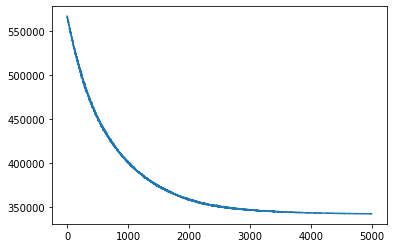

In [9]:
%%time
from treeflow.vi import fit_fixed_topology_variational_approximation
import matplotlib.pyplot as plt

optimizer = tf.optimizers.Adam()
num_steps= 5000
base_approx, (base_loss, base_vars) = fit_fixed_topology_variational_approximation(
    base_model_pinned,
    topologies=dict(tree=tree.topology),
    optimizer=optimizer,
    num_steps=num_steps,
    trace_fn= lambda x: (x.loss, x.parameters)
)
plt.plot(base_loss)

In [43]:
base_approx.trainable_variables

(<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.16263581])>,
 <tf.Variable 'Variable:0' shape=(61,) dtype=float64, numpy=
 array([ 0.85540952,  2.20643827,  0.95070931,  1.12556031,  0.55634178,
         1.2276399 , -0.48604296,  0.02665501,  1.33512476,  2.21472491,
        -1.5922794 ,  2.39989744, -0.32862164,  1.18035041, -0.21015175,
        -0.21712297,  2.20217711,  1.32565655,  1.1764474 , -1.43635806,
         0.7619984 ,  1.05260041,  1.65090904,  2.14006365,  1.79961901,
         2.59608059, -0.56690727,  1.15843805,  2.76331542,  2.07560693,
         3.01290572,  1.66953505,  0.8617562 ,  0.60091185, -0.31940366,
         1.03861557,  2.4360571 ,  2.69201157,  0.11406406,  1.3389898 ,
        -0.483157  ,  0.91245147,  0.57363585,  1.09566117,  1.23080532,
         0.54117357,  1.68369976,  1.24377422, -1.2145578 ,  1.10704769,
         2.0449759 ,  1.2351995 , -0.13311391,  1.50890527,  1.6865685 ,
         0.79243051, -0.59967854, -1.79829315, -0.91867

In [36]:
trainable_vars = base_approx.trainable_variables
sequences_encoded = alignment.get_encoded_sequence_tensor(tree.taxon_set)
with tf.GradientTape() as t:
    for var in trainable_vars:
        t.watch(var)
        sample = base_approx.sample()
        res = base_model.log_prob_parts(dict(**sample, sequences=sequences_encoded))
t.gradient(res, trainable_vars)

(<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-4.77873746])>,
 <tf.Tensor: shape=(61,), dtype=float64, numpy=
 array([-1.02197257e+01, -3.16384003e+01, -1.36247263e+02, -2.53022562e+01,
        -4.73240201e+01, -1.08155021e+02, -7.82999283e+02, -9.23953030e+02,
         1.45437648e+00, -1.36831420e+01, -7.61468989e+00, -2.07107945e+01,
        -1.98882150e+02, -1.42016969e+02, -5.51878686e+02, -1.45413540e+02,
        -6.76001914e+01, -3.90292393e+00,  8.52921164e+00, -5.57390853e+01,
        -1.03739142e+02, -1.32746595e+02, -1.96794921e+02, -2.64666677e+02,
        -3.48961366e+02, -2.58228868e+02, -2.25272453e+01, -3.36215843e+01,
        -5.98770013e+00, -2.87015850e+01, -2.11934824e+01, -9.32090014e+01,
        -3.28586968e+01, -3.22899172e+02, -6.04243307e+02, -3.79852881e+02,
         2.08093492e+00, -4.99148986e+00, -1.76585817e+01, -5.96845941e+00,
        -1.32117858e+02, -8.17770171e+00, -9.01821243e+01, -1.63992772e+02,
        -1.81864516e+02, -1.63433823e+01, -1.47

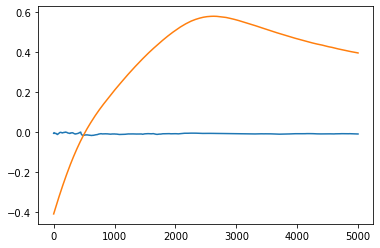

In [15]:
plt.plot(base_vars[6][:, -1].numpy())

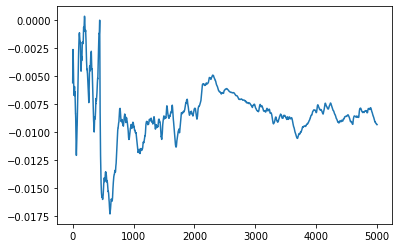

In [22]:
plt.plot(base_vars[1][:, -1].numpy())

In [18]:
tf.math.log(1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [28]:
beast_tree.node_heights[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=0.4979423347646789>

/home/cswa648/dev/treeflow/treeflow/tf_util/attrs.py:7: UserWarning: Temporary hotfix
  warnings.warn("Temporary hotfix")
/home/cswa648/dev/treeflow/treeflow/distributions/tree/birthdeath/birth_death_contemporary_sampling.py:69: UserWarning: Dummy sampling
  warnings.warn("Dummy sampling")


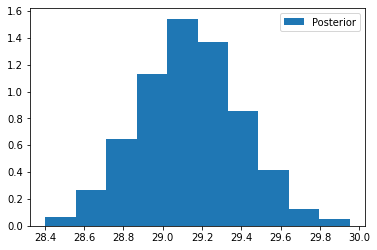

In [25]:
n_samples = 1000
base_samples = base_approx.sample(n_samples)
prior_samples = base_model_pinned.sample_unpinned(n_samples)

plt.hist(base_samples["kappa"].numpy(), label="Posterior", density=True)
plt.legend()

(array([  7.,  35., 118., 195., 246., 204., 140.,  44.,   9.,   2.]),
 array([1.44476158, 1.45376425, 1.46276693, 1.4717696 , 1.48077227,
        1.48977495, 1.49877762, 1.50778029, 1.51678297, 1.52578564,
        1.53478831]),
 <BarContainer object of 10 artists>)

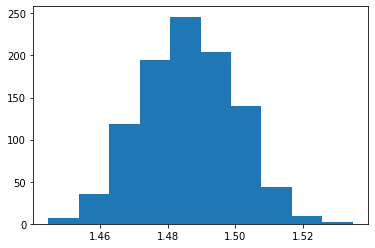

In [27]:
plt.hist(base_samples["tree"].node_heights[:, -1].numpy())

In [33]:
base_tree_samples.branch_lengths

<tf.Tensor: shape=(1000, 122), dtype=float64, numpy=
array([[0.13899349, 0.13899349, 0.17677995, ..., 0.3368649 , 0.68281019,
        0.0483453 ],
       [0.14295028, 0.14295028, 0.18536102, ..., 0.34314651, 0.67218479,
        0.04721869],
       [0.1420228 , 0.1420228 , 0.18003809, ..., 0.33968257, 0.66912872,
        0.04600058],
       ...,
       [0.12980427, 0.12980427, 0.16675469, ..., 0.33853908, 0.68480426,
        0.03562656],
       [0.14232492, 0.14232492, 0.17743752, ..., 0.34363769, 0.6811345 ,
        0.03315829],
       [0.1432013 , 0.1432013 , 0.17916149, ..., 0.33282607, 0.69392304,
        0.04504965]])>

In [28]:
from treeflow.tree.io import write_tensor_trees
from treeflow.model.io import write_samples_to_file

base_out_samples = dict(base_samples)
base_tree_samples = base_out_samples.pop("tree")
write_tensor_trees(
    "demo-data/carnivores.newick", base_tree_samples.branch_lengths, "demo-out/carnivores-base-trees.nexus"
)
write_samples_to_file(
    base_samples, base_model_pinned, "demo-out/carnivores-base-samples.csv", vars=base_out_samples.keys()
)

### Per site kappa parameter

In [11]:
def build_sequence_dist_alt(tree, kappa, frequencies, site_gamma_shape):
    # kappa has shape (..., n_branches)
    unrooted_tree = tree.get_unrooted_tree()
    site_rate_distribution = DiscretizedDistribution(
        category_count=site_category_count,
        distribution=tfp.distributions.Gamma(concentration=site_gamma_shape, rate=site_gamma_shape),
    )
    frequencies_b = tf.broadcast_to(tf.expand_dims(frequencies, -2), kappa.shape + (4,))
    transition_probs_tree = get_transition_probabilities_tree(
        unrooted_tree,
        subst_model,
        rate_categories=site_rate_distribution.normalised_support,
        frequencies=frequencies_b,
        kappa=kappa,
        inner_batch_rank=1,
        batch_rank=-1 # Don't add a batch dimension for branches
    )
    return SampleWeighted(
        DiscreteParameterMixture(
            site_rate_distribution,
            LeafCTMC(
                transition_probs_tree,
                tf.expand_dims(frequencies, -2),
            ),
        ),
        sample_shape=alignment.site_count,
        weights=pattern_counts
    )
alt_model = tfp.distributions.JointDistributionNamed(dict(
    birth_rate=tfp.distributions.LogNormal(c(1.0), c(1.5)),
    tree=lambda birth_rate: treeflow.distributions.Yule(tree.taxon_count, birth_rate, name="tree"),
    kappa=tfp.distributions.Sample(tfp.distributions.LogNormal(c(0.0), c(2.0)), tree.branch_lengths.shape),
    site_gamma_shape=tfp.distributions.LogNormal(c(0.0), c(1.0)),
    frequencies=tfp.distributions.Dirichlet(c([2.0, 2.0, 2.0, 2.0])),
    sequences=build_sequence_dist_alt
))
alt_model_pinned = alt_model.experimental_pin(sequences=alignment.get_encoded_sequence_tensor(tree.taxon_set))
prior_samples = alt_model_pinned.sample_unpinned()
prior_samples.keys()

/home/cswa648/dev/treeflow/treeflow/distributions/leaf_ctmc.py:62: UserWarning: Dummy sampling of alignment
  warnings.warn("Dummy sampling of alignment")


dict_keys(['birth_rate', 'tree', 'site_gamma_shape', 'kappa', 'frequencies'])

In [12]:
%%time
alt_approx, alt_loss = fit_fixed_topology_variational_approximation(
    alt_model_pinned,
    topologies=dict(tree=tree.topology),
    optimizer=optimizer,
    num_steps=num_steps,
    trace_fn= lambda x: x.loss
)
plt.plot(alt_loss)

KeyboardInterrupt: 

In [13]:
alt_samples = alt_approx.sample(n_samples)
plt.hist(alt_samples["tree"].node_heights[:, -1].numpy(), bins=50);

NameError: name 'alt_approx' is not defined

In [ ]:
alt_out_samples = dict(alt_samples)
alt_tree_samples = alt_out_samples.pop("tree")
write_tensor_trees(
    "demo-data/carnivores.newick",
    alt_tree_samples.branch_lengths,
    "demo-out/carnivores-alt-trees.nexus",
    branch_metadata=dict(kappa=alt_out_samples["kappa"])
)
write_samples_to_file(
    alt_samples, alt_model_pinned, "demo-out/carnivores-alt-samples.csv", vars=alt_out_samples.keys()
)

In [ ]:
[tf.reduce_mean(x[-100:]) for x in [base_loss, alt_loss]]

In [ ]:
from treeflow.vi import estimate_log_ml_importance_sampling

ml_n_samples = 100
base_ml_result = estimate_log_ml_importance_sampling(base_model_pinned, base_approx, vectorize_log_prob=False, n_samples=ml_n_samples)
alt_ml_result = estimate_log_ml_importance_sampling(alt_model_pinned, alt_approx, vectorize_log_prob=False, n_samples=ml_n_samples)

dict(
    base=base_ml_result.numpy(),
    lineage_variation=alt_ml_result.numpy()
)

In [ ]:
import joypy
import numpy as np
import pandas as pd

kappa_df = pd.DataFrame(alt_samples["kappa"].numpy())
n_columns = 20
columns = np.random.choice(kappa_df.columns, n_columns, replace=False)
joypy.joyplot(kappa_df[columns]);

## Results visualisation


* Use existing tree viz tools